# Spectral Clustering

Let $G$ denote the graph. We assume that two distinct vertices either share no edge or have only one shared edge. Let $\{e_1,\ldots,e_m\}$ and $\{v_1,\ldots,v_n\}$ denote the edges and the vertices of $G$ respectively, and give a random orientation to the edges. Let $B_1,\ldots,B_n$ be the columns of $B$. The entry at the $i$th row and $j$th column of $B^\top B$ is $B_i^\top B_j=\sum_{k=1}^mB_{i,k}B_{j,k}$. By definition,
\begin{align*}
 B_{i,k}=
 \begin{cases}
  1&\text{if edge }e_k\text{ starts at vertex }v_i,\\
  -1&\text{if edge }e_k\text{ ends at vertex }v_i,\\
  0&\text{otherwise},
 \end{cases}
\end{align*}
and similarly for $B_{j,k}$. In particular, if $i\neq j$, then $B_{i,k}B_{j,k}\neq0$ if and only if $e_k=(v_i,v_j)$ or $e_k=(v_j,v_i)$. Moreover, for any $i \neq j$, this can be true only for one $k = 1,\ldots,m$ as there is a unique edge between $i$ and $j$.
Thus, we obtain
\begin{align*}
 B_i^\top B_j
 =
 \begin{cases}
  \displaystyle\sum_{\substack{k=1\\v_i\in e_k}}^m1^2=d_i&\text{if }i=j,\\
  1\cdot(-1)+(m-1)\cdot0=-1&\text{if }i\neq j\text{ and }i\text{ and }j\text{ share an edge},\\
  0&\text{if }i\neq j\text{ and }i\text{ and }j\text{ do not share an edge}.
 \end{cases}
\end{align*}
This is exactly the entry at the $i$th row and $j$th column of $L$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Part B: Load and Clean Graph Data

1. load the data <br/>
2. remove isolated nodes <br />
3. change graph to undirected

In [2]:
graph = nx.read_gml('polblogs.gml')
graph.remove_nodes_from(list(nx.isolates(graph)))
graph = graph.to_undirected()

### Adjacent Matrix

4. sum the weights for multiple edges to get the adjacent matrix
5. Collapsing multiples edges between vertices into a single edge by replacing weights > 1 with 1

In [38]:
A = nx.to_numpy_array(graph)
#see how many values are changed
B = A[A > 1]
A[A > 1] = 1
A.max()

1.0

In [41]:
print("Collapse multiple edges:", B.shape[0])

Collapse multiple edges: 130


In [4]:
A.shape

(1224, 1224)

# Part C: Spectural Clustering

• The adjacency matrix A of the graph <br/>
• The graph laplacian D - A <br/>
• The normalized laplacian D<sup>-1/2</sup>(D - A)D<sup>1/2</sup> <br/>

1. Get eigenvalues & eigenvectors of adjacency matrix
2. absolute value is taken to remove negative eigenvalues
3. Find the 2 smallest eigenvalues and eigenvectors

In [5]:
def get_eigen_value_vector(matrix):
    eigvalues, eigvectors = np.linalg.eig(matrix)
    eigvalues = abs(eigvalues.real) 
    eigvectors = np.asmatrix(abs(eigvectors.real))

    eigvector_0 = eigvectors[:,np.argsort(eigvalues)[:1]] 
    eigvector_1 = eigvectors[:,np.argsort(eigvalues)[1:2]]
    #get smallest eigenvectors
    eigvectors_sm = np.concatenate([eigvector_0,eigvector_1], axis=1)
    return eigvalues, eigvectors_sm

In [6]:
eigvalues_A, eigvectors_2_A = get_eigen_value_vector(A)

In [7]:
#smallest eigenvectors
eigvectors_2_A

matrix([[8.30594893e-17, 7.43204731e-17],
        [7.67313154e-18, 7.06062900e-18],
        [2.03328533e-18, 2.53204659e-18],
        ...,
        [1.30085828e-16, 8.97951769e-17],
        [2.07133171e-18, 1.92493290e-18],
        [1.88320605e-02, 1.78323982e-02]])

### Laplacian

1. find D
2. find L with **L = D - A** <br/>

In [9]:
D = np.sum(np.array(A), axis=1)
D =  np.diag(D)

In [10]:
L = D - A
L

array([[26., -1.,  0., ...,  0.,  0.,  0.],
       [-1., 45.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ..., -1., 18.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

3. find eigenvectors and eigenvalues of Laplace matrix
4. find 2 smallest eigenvalues and eigenvectors

In [11]:
eigvalues_L, eigvectors_2_L = get_eigen_value_vector(L) 

In [12]:
eigvectors_2_L

matrix([[0.01578182, 0.01597751],
        [0.01578182, 0.01597751],
        [0.01578182, 0.01597751],
        ...,
        [0.01578182, 0.01597751],
        [0.01578182, 0.01597751],
        [0.01578182, 0.01597751]])

### Normalized Laplacian

5. The normalized laplacian D<sup>-1/2</sup>(D - A)D<sup>-1/2</sup> <br/>

In [14]:
D_sqrt = np.sqrt(D)
norm_L = np.linalg.inv(D_sqrt).dot(L).dot(np.linalg.inv(D_sqrt))

Get eigenvectors and eigenvalues

In [15]:
eigvalues_norm_L, eigvectors_2_norm_L = get_eigen_value_vector(norm_L) 

In [16]:
eigvectors_2_norm_L

matrix([[2.78876546e-02, 1.14192072e-16],
        [3.66886366e-02, 3.36068508e-17],
        [1.09384381e-02, 6.60811538e-17],
        ...,
        [5.46921903e-03, 1.27762181e-16],
        [2.32039312e-02, 9.83207081e-17],
        [5.46921903e-03, 6.47503952e-17]])

### K Means

4. use K means with 2 clusters <br />
5. fit on the eigenvectors for the respective matrices A, L, norm_L

In [18]:
KM_A = KMeans(n_clusters=2).fit(eigvectors_2_A)
KM_L = KMeans(n_clusters=2).fit(eigvectors_2_L)
KM_norm_L = KMeans(n_clusters=2).fit(eigvectors_2_norm_L)

# Part D: Evaluate Error for the 3 Approaches

In [19]:
true_labels = np.array(list(nx.get_node_attributes(graph,'value').values()))
true_labels

array([0, 0, 0, ..., 1, 1, 1])

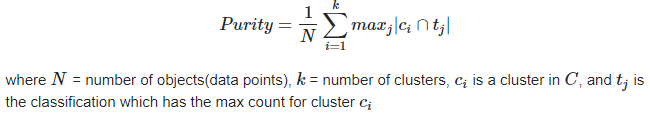

Calculate purity to evaluate our cluster models

In [20]:
cm_A = metrics.cluster.contingency_matrix(true_labels, KM_A.labels_)
cm_L = metrics.cluster.contingency_matrix(true_labels, KM_L.labels_)
cm_norm_L = metrics.cluster.contingency_matrix(true_labels, KM_norm_L.labels_)
purity_A = np.sum(np.amax(cm_A, axis=0)) / np.sum(cm_A)
purity_L = np.sum(np.amax(cm_L, axis=0)) / np.sum(cm_L)
purity_norm_L = np.sum(np.amax(cm_norm_L, axis=0)) / np.sum(cm_norm_L)

In [21]:
print("the error with adjacency matrix: ",1-purity_A)
print("the error with Laplacian matrix: ",1-purity_L)
print("the error with normalized Laplacian matrix: ",1-purity_norm_L)

the error with adjacency matrix:  0.48039215686274506
the error with Laplacian matrix:  0.4787581699346405
the error with normalized Laplacian matrix:  0.4787581699346405


# Part E: Weighted Undirected Graph

Do not collapse multiple edges if they exist, add up
their contributions to form an adjacency matrix

In [22]:
A_weighted = nx.to_numpy_array(graph)
A_weighted.max()

2.0

In [23]:
eigvalues_A_weighted, eigvectors_2_A_weighted = get_eigen_value_vector(A_weighted)

In [24]:
#smallest eigenvectors
eigvectors_2_A_weighted

matrix([[2.86577628e-17, 2.86577628e-17],
        [5.89222021e-18, 5.89222021e-18],
        [4.86250903e-19, 4.86250903e-19],
        ...,
        [2.09075064e-16, 2.09075064e-16],
        [2.21043547e-18, 2.21043547e-18],
        [1.09498406e-03, 1.09498406e-03]])

### Laplacian

1. find D
2. find L with **L = D - A** <br/>

In [26]:
D_weighted = np.sum(np.array(A_weighted), axis=1)
D_weighted =  np.diag(D_weighted)

In [27]:
L_weighted = D_weighted - A_weighted
L_weighted

array([[26., -1.,  0., ...,  0.,  0.,  0.],
       [-1., 45.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ..., -1., 18.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

3. find eigenvectors and eigenvalues of Laplace matrix
4. find 2 smallest eigenvalues and eigenvectors

In [28]:
eigvalues_L_weighted, eigvectors_2_L_weighted = get_eigen_value_vector(L_weighted) 

In [29]:
eigvectors_2_L_weighted.shape

(1224, 2)

### Normalized Laplacian

5. The normalized laplacian D<sup>-1/2</sup>(D - A)D<sup>-1/2</sup> <br/>

In [31]:
D_sqrt_weighted = np.sqrt(D_weighted)
norm_L_weighted = np.linalg.inv(D_sqrt_weighted).dot(L_weighted).dot(np.linalg.inv(D_sqrt_weighted))

Get eigenvectors and eigenvalues

In [32]:
eigvalues_norm_L_weighted, eigvectors_2_norm_L_weighted = get_eigen_value_vector(norm_L_weighted) 

In [33]:
eigvectors_2_norm_L_weighted.shape

(1224, 2)

### K Means

4. use K means with 2 clusters <br />
5. fit on the eigenvectors for the respective matrices A, L, norm_L

In [35]:
KM_A_weighted = KMeans(n_clusters=2).fit(eigvectors_2_A_weighted)
KM_L_weighted = KMeans(n_clusters=2).fit(eigvectors_2_L_weighted)
KM_norm_L_weighted = KMeans(n_clusters=2).fit(eigvectors_2_norm_L_weighted)

## Evaluate Error for the 3 Approaches

Calculate purity to evaluate clustering models

In [36]:
cm_A_weighted = metrics.cluster.contingency_matrix(true_labels, KM_A_weighted.labels_)
cm_L_weighted = metrics.cluster.contingency_matrix(true_labels, KM_L_weighted.labels_)
cm_norm_L_weighted = metrics.cluster.contingency_matrix(true_labels, KM_norm_L_weighted.labels_)
purity_A_weighted = np.sum(np.amax(cm_A_weighted, axis=0)) / np.sum(cm_A_weighted)
purity_L_weighted = np.sum(np.amax(cm_L_weighted, axis=0)) / np.sum(cm_L_weighted)
purity_norm_L_weighted = np.sum(np.amax(cm_norm_L_weighted, axis=0)) / np.sum(cm_norm_L_weighted)

In [37]:
print("the error with adjacency matrix: ",1-purity_A_weighted)
print("the error with Laplacian matrix: ",1-purity_L_weighted)
print("the error with normalized Laplacian matrix: ",1-purity_norm_L_weighted)

the error with adjacency matrix:  0.48039215686274506
the error with Laplacian matrix:  0.4787581699346405
the error with normalized Laplacian matrix:  0.4787581699346405


### Based on the outputs, there are no differences between the errors for weighted and unweighted when evaluating the performance of the models based on purity.